In [1]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json

 ## Gathering Data

## Import Enhance Twitter archieve

In [2]:
twi_arc = pd.read_csv("twitter-archive-enhanced.csv")

###### Download twitter image prediction "programatically use requests" provided url "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [224]:
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

#bring the content of the response in file
with open("image_predictions.tsv", mode = 'wb') as file:
    file.write(response.content)


#### getting twitter data

In [4]:
import json
tweet_list = []
with open ('tweet-json.txt') as file:
    for line in file:
        tweet_list.append(json.loads(line))

In [5]:
tweet_list[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

## we want only retweet_count, fav_count from txt.file 

In [6]:
#create new DataFrame from the previous list that contains the id,retweet_count, fav_count 

twi_data = pd.DataFrame(tweet_list, columns = ['id', 'retweet_count','favorite_count'])


In [7]:
#change column Id to tweet_id
twi_data = twi_data.rename(columns = {'id':'tweet_id'})
twi_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [8]:
#save twi_data dataframe to .csv file for future use without the index column 

twi_data.to_csv('tweet_data.csv', index = False)


In [9]:
#check the file was saved correctly 

twi_api = pd.read_csv('tweet_data.csv')
twi_api.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### All the Above was Gathering 



# Assessment Data 



# A: Assessing for Enhance Twitter archieve

In [225]:
twi_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
twi_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twi_arc.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [13]:
twi_arc[twi_arc.rating_numerator<10].count()[0]


440

In [14]:
# check which ids have numerator < 10

twi_arc[twi_arc.rating_numerator<10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
485     814578408554463233
599     798682547630837760
605     798576900688019456
730     781661882474196992
745     780092040432480260
764     777953400541634568
765     777885040357281792
784     775096608509886464
814     771014301343748096
835     768193404517830656
845     766423258543644672
859     763183847194451968
860     763167063695355904
883     760252756032651264
896     759099523532779520
906     758041019896193024
912     757596066325864448
915     757354760399941633
936     753375668877008896
946     752568224206688256
948     752334515931054080
956     751583847268179968
964     750506206503038976
966     750383411068534784
987     749036806121881602
               ...        
2312    666776908487630848
2314    666701168228331520
2315    666691418707132416
2316    666649482315059201
2317    666644823164719104
2319    666447344410484738
2

In [15]:
# check rating numerator of tweet_id 2355    666020888022790149 (*random one*)

twi_arc.loc[(twi_arc.tweet_id == 666020888022790149), 'rating_numerator']

2355    8
Name: rating_numerator, dtype: int64

In [16]:
twi_arc.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [17]:
#which ids have demonators with a 0 value 
#only one does
twi_arc[twi_arc.rating_denominator==0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [18]:
twi_arc.loc[(twi_arc.tweet_id == 835246439529840640), 'rating_denominator']

313    0
Name: rating_denominator, dtype: int64

In [19]:
#use the location of this ids to see the text wrote for this id

twi_arc.loc[313, 'text']

#appeard that someone trying to correct this tweet

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [20]:
#how many denominator not equal 10

twi_arc[twi_arc.rating_denominator != 10].count()[0]

23

In [21]:
# #what the names of dogs lookslike
twi_arc.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
the           8
Sadie         8
Toby          7
Bailey        7
Daisy         7
an            7
Buddy         7
Bella         6
Jax           6
Oscar         6
Jack          6
Koda          6
Dave          6
Milo          6
Leo           6
Rusty         6
Stanley       6
Scout         6
Sammy         5
           ... 
Devón         1
Clybe         1
Jo            1
Leonidas      1
Richie        1
Lillie        1
Monkey        1
Severus       1
Cal           1
Aja           1
Rilo          1
Ike           1
Dallas        1
Jiminus       1
Pippin        1
Vince         1
Vixen         1
Fabio         1
Angel         1
Norman        1
Holly         1
Lacy          1
Clyde         1
Anthony       1
Sailor        1
Oddie         1
Teddy         1
Kallie        1
Julio         1
Vinscent      1
Name: name, Length: 957,

# B: Asessment 2 Tweet image prediction

In [22]:
twi_pre = pd.read_csv("image_predictions.tsv", sep='\t')
twi_pre.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
twi_pre.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
542,677228873407442944,https://pbs.twimg.com/media/CWYAEINW4AIuw8P.jpg,1,common_iguana,0.566338,False,tennis_ball,0.154646,False,green_lizard,0.044976,False
438,674422304705744896,https://pbs.twimg.com/media/CVwHgblWcAACWOD.jpg,1,golden_retriever,0.964497,True,Labrador_retriever,0.009006,True,tennis_ball,0.007139,False
141,668567822092664832,https://pbs.twimg.com/media/CUc64knWoAkZt70.jpg,1,Shih-Tzu,0.985649,True,Lhasa,0.007078,True,Pekinese,0.003053,True
88,667530908589760512,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,1,golden_retriever,0.633037,True,kuvasz,0.146391,True,Labrador_retriever,0.046184,True
153,668655139528511488,https://pbs.twimg.com/media/CUeKTeYW4AEr_lx.jpg,1,beagle,0.319110,True,Italian_greyhound,0.103338,True,basenji,0.091930,True
994,708130923141795840,https://pbs.twimg.com/media/CdPJUWIWIAAIchl.jpg,1,French_bulldog,0.710354,True,Chihuahua,0.262302,True,Cardigan,0.006904,True
1206,742150209887731712,https://pbs.twimg.com/media/CkylrVWWsAAiXJE.jpg,1,Siamese_cat,0.112413,False,French_bulldog,0.071414,True,hog,0.062465,False
1794,831309418084069378,https://pbs.twimg.com/media/C4lngK5VUAEVrNO.jpg,1,Doberman,0.369389,True,kelpie,0.132449,True,Labrador_retriever,0.074727,True
1134,728653952833728512,https://pbs.twimg.com/media/Chyy5lQWUAEzxSL.jpg,2,window_shade,0.594333,False,studio_couch,0.053515,False,rotisserie,0.041248,False
134,668484198282485761,https://pbs.twimg.com/media/CUbu1GAWsAEH3E-.jpg,1,standard_poodle,0.587372,True,Bedlington_terrier,0.182411,True,Afghan_hound,0.040968,True


In [24]:
twi_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
twi_pre.isnull()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


# C: Assessment twitter API Data

In [26]:
twi_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [27]:
twi_api.isnull()

,tweet_id,retweet_count,favorite_count
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [28]:
twi_api.sample(10)

,tweet_id,retweet_count,favorite_count
2083,670804601705242624,1035,2098
1348,704113298707505153,629,2031
525,808838249661788160,3536,11271
462,817423860136083457,17504,38260
1185,718460005985447936,602,2846
1589,686606069955735556,607,2071
841,766714921925144576,438,2872
1555,688804835492233216,227,1043
1514,690959652130045952,1421,3902
142,864197398364647424,9616,31459


# Overall assessment:

# Tidiness

### 1- Dog stages is separated into 4 columns 
### 2- The data separated into 3 data frames

# Qualities 

# A) twi_arc

### 1- retweet_status_id 181 retweets "missing values" floats64
 
### 2- retweet_status_timestamp 181 retweets "missing values" object

### 3- retweet_status_user_id 181 retweets "missing values" float64

### 4- some names of dogs are invalid ('None, a, an instead of name')

### 5- invalid dtype of tweet_id int (I'm not gonna add a calculations on it) convert to str

### 6- invalid dtype of timestamps object should be int 

### 7- 440 rating numerator less than 10 ('invalid')
 
### 8- 313 is = 0 of rating denominator 'invalid'

### 9- 23 rating denominatornot equal to 10 'invalid all rating should dem = 10'

# B) twi_pre
 
### 1- missing photos ('entries = 2075 row, instead of 2356')

### 2- some names of P start with uppercase letters while others start with lowercase

# C) twi_api

### 1- missing entries '2354 instead of 2356'


# Cleaning Data 

# A. Create copies of datafame 

In [29]:
c_twi_arc = twi_arc.copy()
c_twi_pre = twi_pre.copy()
c_twi_api = twi_api.copy()

# B. Cleaning tidiness issues

### 1- Dog stages is separated into 4 columns

## Define 

## Merge the 4 columns into 1 called stage

 ## Code


In [30]:
# get the dog stages from the text to new column called stage

c_twi_arc['dog_stage'] = c_twi_arc['text'].str.extract('(doggo|floofer|pupper|puppo)')
c_twi_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


In [31]:

#remove unneccesary columns that represent the stage

c_twi_arc = c_twi_arc.drop(columns = ['doggo','floofer','pupper','puppo']) 

## Test 

In [32]:
c_twi_arc.dog_stage.isnull()

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9       False
10       True
11       True
12      False
13       True
14      False
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29      False
        ...  
2326     True
2327     True
2328     True
2329     True
2330     True
2331     True
2332     True
2333     True
2334     True
2335     True
2336     True
2337     True
2338     True
2339     True
2340     True
2341     True
2342     True
2343     True
2344     True
2345     True
2346     True
2347     True
2348     True
2349     True
2350     True
2351     True
2352     True
2353     True
2354     True
2355     True
Name: dog_stage, Length: 2356, dtype: bool

 ### 2- the data separated into 3 data frames

## Define

# Merge the data into one dataframe 

## Code 

In [33]:
#merging c_twi_arc with c_twi_api

c_twi_arc = pd.merge(c_twi_arc, c_twi_api,  on = 'tweet_id', how = 'left')

# merging the resulted archive with tweet image 

c_twi_arc = pd.merge(c_twi_arc, c_twi_pre, on = 'tweet_id', how = 'left')

## Test 

In [34]:
c_twi_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
retweet_count                 2354 non-null float64
favorite_count                2354 non-null float64
jpg_url                       2075 non-null object
img_num                       2

## C: cleaning quality

### AQ1 there are 181 retweets as noticed in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

## Define 

## Code

In [35]:
# we want only the original tweets

c_twi_arc = c_twi_arc[c_twi_arc.retweeted_status_id.isnull()]


In [36]:
#delete the columns
c_twi_arc = c_twi_arc.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

## Test

In [37]:
c_twi_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


### AQ2 some dogs names are invalid (none, a, an instead of names)


# Define

### convert the invalid names (None or starting with lowecase letters) to NaN & extract the collect names from the text col)

## Code

In [53]:
c_twi_arc.name = c_twi_arc.name.replace(regex = ['^[a-z]+', 'None'], value = np.nan)

In [54]:
#checking no. of null values in name column after conversion
sum(c_twi_arc.name.isnull())

784

In [67]:
# Extract names from text column & returned NaN if there is no 'named' word

def function(text):
    txt_list = text.split()
    for word in txt_list:
        if word.lower() == 'named':
            name_index = txt_list.index(word)+1
            return txt_list[name_index]
        else:
            pass
    return np.nan

In [68]:
# np.where condition (what to do if condition is true and what to do if the condition is false)
c_twi_arc.name = np.where(c_twi_arc.name.isnull(), c_twi_arc.text.apply(function),c_twi_arc.name)

In [69]:
sum(c_twi_arc.name.isnull())

761

## AQ3 Change Dtype

## Define

### correct the invalid dtype of tweet_id to string, due im not gonna do any calculation on it

## Code 

In [72]:
# converst tweet_id to string since no operation will be performed  on its values
c_twi_arc.tweet_id = c_twi_arc.tweet_id.astype(str)

## Test

In [73]:
c_twi_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1414 non-null object
dog_stage                364 non-null object
retweet_count            2175 non-null float64
favorite_count           2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf             

### AQ4 invalid timestamp data type convert it to datetime

## Define

# convert timestamp dtype to datetime

## Code

In [74]:
c_twi_arc.timestamp = pd.to_datetime(c_twi_arc.timestamp)

## Test

In [75]:
c_twi_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1414 non-null object
dog_stage                364 non-null object
retweet_count            2175 non-null float64
favorite_count           2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf     

### BQ1: Missing photos for some IDs (2075 rows instead of 2356)

## Define 

#### Delete rows with missing photos

## Code 

In [76]:
c_twi_arc = c_twi_arc[c_twi_arc.jpg_url.notnull()] 

## Test

In [77]:
c_twi_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1373 non-null object
dog_stage                326 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf     

# Storing 

In [175]:
#storing the data 
c_twi_arc.to_csv('twi_arc_master.csv', index = False)

In [185]:
df = pd.read_csv('twi_arc_master.csv')

In [186]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1.0,ORANGE,0.097049,False,BAGEL,0.085851,False,BANANA,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1.0,CHIHUAHUA,0.323581,True,PEKINESE,0.090647,True,PAPILLON,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1.0,CHIHUAHUA,0.716012,True,MALAMUTE,0.078253,True,KELPIE,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1.0,PAPER_TOWEL,0.170278,False,LABRADOR_RETRIEVER,0.168086,True,SPATULA,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2.0,BASSET,0.555712,True,ENGLISH_SPRINGER,0.225770,True,GERMAN_SHORT-HAIRED_POINTER,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,...,1.0,CHESAPEAKE_BAY_RETRIEVER,0.425595,True,IRISH_TERRIER,0.116317,True,INDIAN_ELEPHANT,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,1.0,APPENZELLER,0.341703,True,BORDER_COLLIE,0.199287,True,ICE_LOLLY,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,...,2.0,POMERANIAN,0.566142,True,ESKIMO_DOG,0.178406,True,PEMBROKE,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,1.0,IRISH_TERRIER,0.487574,True,IRISH_SETTER,0.193054,True,CHESAPEAKE_BAY_RETRIEVER,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,1.0,PEMBROKE,0.511319,True,CARDIGAN,0.451038,True,CHIHUAHUA,0.029248,True



# Data Visualization 

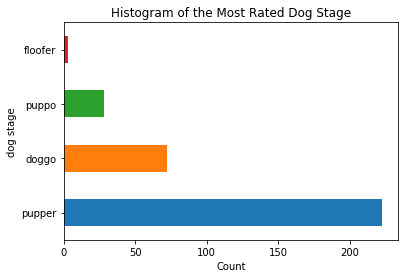

In [188]:
df['dog_stage'].value_counts().plot(kind = 'barh');

plt.title('Histogram of the Most Rated Dog Stage')
plt.xlabel('Count')
plt.ylabel('dog stage');

## Pupper is the most common dog in this dataset.

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1373 non-null object
dog_stage                326 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                

In [190]:
df['rating'] = df['rating_numerator']/df['rating_denominator']

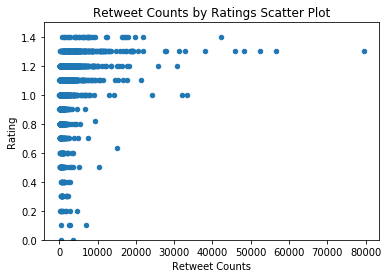

In [191]:
df.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Rating')
plt.title('Retweet Counts by Ratings Scatter Plot');
plt.ylim(0, 1.50)

shadow = True


## The highest ratings do not receive the most retweets.

In [236]:

df.rating.sort_values()

235       0.000000
756       0.000000
1900      0.100000
1735      0.100000
1976      0.100000
1519      0.100000
1878      0.200000
1419      0.200000
1887      0.200000
1566      0.200000
1964      0.200000
1723      0.200000
1422      0.200000
1948      0.200000
891       0.200000
1987      0.200000
1487      0.300000
1844      0.300000
1547      0.300000
1943      0.300000
1780      0.300000
1574      0.300000
1021      0.300000
554       0.300000
915       0.300000
1972      0.300000
1355      0.300000
1167      0.300000
1273      0.300000
1106      0.300000
           ...    
278       1.400000
131       1.400000
297       1.400000
21        1.400000
549       1.400000
681       1.400000
165       1.400000
399       1.400000
95        1.400000
206       1.400000
786       1.400000
634       1.400000
100       1.400000
64        1.400000
332       1.400000
162       1.400000
36        1.400000
571       1.400000
49        1.400000
113       1.400000
153       1.400000
119       1.

In [241]:
df.loc[235, 'jpg_url']

'https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg'

In [247]:
from IPython.display import Image
Image ( url = 'https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg')

In [243]:
df.loc[756, 'jpg_url']

'https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg'

In [249]:
from IPython.display import Image
Image ( url = 'https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg')

In [245]:
df.loc[726, 'jpg_url']

'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg'

In [250]:
from IPython.display import Image
Image ( url = 'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg')

In [192]:
df_d_stage_mean = df.groupby('dog_stage').mean()
df_d_stage_mean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,rating
dog_stage,,,,,,,,,,,,,,,
doggo,7.947217e+17,7.331095e+17,4.196984e+09,14.305556,12.222222,5933.111111,16687.916667,1.236111,0.600735,0.736111,0.140837,0.763889,0.058435,0.680556,1.163889
floofer,8.199891e+17,NaN,NaN,12.666667,10.000000,8529.000000,22929.000000,1.333333,0.762728,1.000000,0.085611,1.000000,0.052990,1.000000,1.266667
pupper,7.169917e+17,6.860491e+17,4.196984e+09,12.995516,12.152466,2301.955157,7062.336323,1.246637,0.601168,0.704036,0.129131,0.730942,0.057752,0.704036,1.064126
puppo,8.175614e+17,NaN,NaN,12.142857,10.000000,6777.142857,22758.928571,1.321429,0.677957,0.892857,0.154830,0.928571,0.046156,0.964286,1.214286


In [193]:
df_d_stage_sorted = df_d_stage_mean['rating'].sort_values()

df_d_stage_sorted

dog_stage
pupper     1.064126
doggo      1.163889
puppo      1.214286
floofer    1.266667
Name: rating, dtype: float64

In [194]:
df_d_stage_count = df.groupby('dog_stage').count()
df_d_stage_count

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
dog_stage,,,,,,,,,,,,,,,,,,,,,
doggo,72,1,1,72,72,72,72,72,72,39,...,72,72,72,72,72,72,72,72,72,72
floofer,3,0,0,3,3,3,3,3,3,2,...,3,3,3,3,3,3,3,3,3,3
pupper,223,3,3,223,223,223,223,223,223,121,...,223,223,223,223,223,223,223,223,223,223
puppo,28,0,0,28,28,28,28,28,28,19,...,28,28,28,28,28,28,28,28,28,28


In [203]:
d_stage_count = df_d_stage_count['rating']
d_stage_mean = df_d_stage_mean['rating']
d_stage_mean

dog_stage
doggo      1.163889
floofer    1.266667
pupper     1.064126
puppo      1.214286
Name: rating, dtype: float64

In [205]:
df_d = pd.DataFrame()
df_d['dog_stage_count'] = dog_stage_count
df_d['dog_stage_mean'] = dog_stage_mean
df_d

,dog_stage_count,dog_stage_mean
dog_stage,,
doggo,72,1.163889
floofer,3,1.266667
pupper,223,1.064126
puppo,28,1.214286


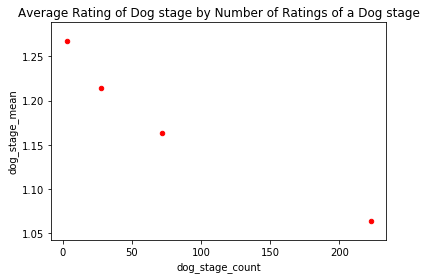

In [227]:
df_d.plot(x='dog_stage_count', y='dog_stage_mean', kind='scatter', color='red')

plt.title('Average Rating of Dog stage by Number of Ratings of a Dog stage');